# 1. Satellite Image Segmentation: Data Exploration & Preprocessing

This notebook covers the initial steps of the building footprint segmentation project. Here, we will:
1.  Load the satellite imagery and corresponding masks.
2.  Perform necessary preprocessing steps.
3.  Visualize the data to understand its structure.
4.  Save the processed data into NumPy arrays for efficient loading during model training.

In [73]:
# Import necessary libraries
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ensure plots are displayed inline in the notebook
%matplotlib inline

## 1.1. Define Paths and Constants

We define the paths to our local data directories and set some constants like image dimensions.

In [74]:
# Define paths relative to the notebook's location
# Assumes the 'data' folder is in the parent directory of the 'notebooks' folder.
TRAIN_IMAGE_PATH = '../data/train/'
TEST_IMAGE_PATH = '../data/test/'

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

## 1.2. Load Image and Mask File Paths

We'll use `glob` to collect all the file paths for our training and testing images and their corresponding masks.

In [75]:
train_image_files = sorted(glob.glob(os.path.join(TRAIN_IMAGE_PATH, '*_image.tif')))
train_mask_files = sorted(glob.glob(os.path.join(TRAIN_IMAGE_PATH, '*_label.tif')))

test_image_files = sorted(glob.glob(os.path.join(TEST_IMAGE_PATH, '*_image.tif')))
test_mask_files = sorted(glob.glob(os.path.join(TEST_IMAGE_PATH, '*_label.tif')))

print(f"Found {len(train_image_files)} training images and {len(train_mask_files)} training masks.")
print(f"Found {len(test_image_files)} testing images and {len(test_mask_files)} testing masks.")

Found 70 training images and 70 training masks.
Found 30 testing images and 30 testing masks.


## 1.3. Preprocess and Convert Data to NumPy Arrays

Now, we'll iterate through the file paths, open each image and mask, and convert them into NumPy arrays. This format is optimal for feeding into a TensorFlow/Keras model.

In [76]:
def load_and_preprocess_data(image_files, mask_files, num_images):
    """
    Loads images and masks from file paths and converts them to NumPy arrays.
    """
    # Create empty arrays with the correct dimensions
    X_data = np.zeros((num_images, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    Y_data = np.zeros((num_images, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

    for i, (img_path, mask_path) in enumerate(zip(image_files, mask_files)):
        # Load and process the image
        img = Image.open(img_path)
        X_data[i] = np.array(img)

        # Load and process the mask
        mask = Image.open(mask_path).convert('L') # Convert to grayscale
        Y_data[i] = np.array(mask).reshape(IMG_HEIGHT, IMG_WIDTH, 1)

    return X_data, Y_data

# Process training data
X_train, Y_train = load_and_preprocess_data(train_image_files, train_mask_files, len(train_image_files))

# Process testing data
X_test, Y_test = load_and_preprocess_data(test_image_files, test_mask_files, len(test_image_files))

print("Data preprocessing complete.")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


Data preprocessing complete.
X_train shape: (70, 128, 128, 3)
Y_train shape: (70, 128, 128, 1)



## 1.4. Visualize a Sample

Let's visualize a random sample from the training set to ensure the data has been loaded correctly.

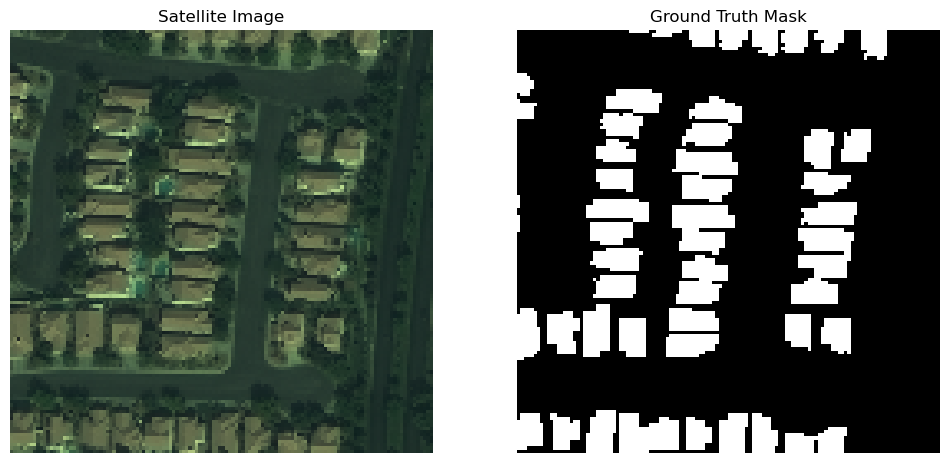

In [77]:
# Select a random index
random_index = np.random.randint(0, len(X_train))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the satellite image
ax[0].imshow(X_train[random_index])
ax[0].set_title('Satellite Image')
ax[0].axis('off')

# Display the corresponding building mask
ax[1].imshow(np.squeeze(Y_train[random_index]), cmap='gray')
ax[1].set_title('Ground Truth Mask')
ax[1].axis('off')

plt.show()

## 1.5. Save Processed Data

Finally, we save the processed NumPy arrays into the `data` folder. This allows our training notebook to load them directly without re-running the preprocessing steps.

In [78]:
# Define the output directory for the processed data
PROCESSED_DATA_PATH = '../data/processed/'
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

# Save the arrays
np.save(os.path.join(PROCESSED_DATA_PATH, 'X_train.npy'), X_train)
np.save(os.path.join(PROCESSED_DATA_PATH, 'Y_train.npy'), Y_train)
np.save(os.path.join(PROCESSED_DATA_PATH, 'X_test.npy'), X_test)
np.save(os.path.join(PROCESSED_DATA_PATH, 'Y_test.npy'), Y_test)

print("Processed data saved successfully to 'data/processed/'")

Processed data saved successfully to 'data/processed/'
